In [7]:
# prepare environment
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
from statsmodels.formula.api import ols
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score
from sklearn.feature_selection import f_regression 
from math import sqrt
import matplotlib.pyplot as plt
from pydataset import data
%matplotlib inline

### Exercises
1. load the tips dataset from either pydataset or seaborn

In [2]:
tips = data('tips')

In [3]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
1,16.99,1.01,Female,No,Sun,Dinner,2
2,10.34,1.66,Male,No,Sun,Dinner,3
3,21.01,3.50,Male,No,Sun,Dinner,3
4,23.68,3.31,Male,No,Sun,Dinner,2
5,24.59,3.61,Female,No,Sun,Dinner,4


In [4]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 244 entries, 1 to 244
Data columns (total 7 columns):
total_bill    244 non-null float64
tip           244 non-null float64
sex           244 non-null object
smoker        244 non-null object
day           244 non-null object
time          244 non-null object
size          244 non-null int64
dtypes: float64(2), int64(1), object(4)
memory usage: 15.2+ KB


2. Fit a linear regression model (ordinary least squares) and compute yhat, predictions of tip using total_bill.


In [9]:
# assign variables for x and y
# double brackets keeps the column of the DataFrame
x = tips[['total_bill']]
y = tips[['tip']]

# fit the model to data
ols_model = ols('y ~ x', data=tips).fit()
ols_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.457
Model:                            OLS   Adj. R-squared:                  0.454
Method:                 Least Squares   F-statistic:                     203.4
Date:                Thu, 02 Apr 2020   Prob (F-statistic):           6.69e-34
Time:                        21:25:18   Log-Likelihood:                -350.54
No. Observations:                 244   AIC:                             705.1
Df Residuals:                     242   BIC:                             712.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.9203      0.160      5.761      0.000       0.606       1.235
x              0.1050      0.007     14.260      0.000       0.091       0.120
==============================================================================
Omnibus:                       20.185   Durbin-Watson:                   2.151
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               37.750
Skew:                           0.443   Prob(JB):                     6.35e-09
Kurtosis:                       4.711   Cond. No.                         53.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [10]:
# dropping columns sex, smoker, day, time, size
df = tips.drop(columns=["sex", "smoker", "day", "time", "size"])
df.head()

,total_bill,tip
1,16.99,1.01
2,10.34,1.66
3,21.01,3.50
4,23.68,3.31
5,24.59,3.61


In [12]:
# compute yhat, the predictions of tip using total_bill
tips["yhat"] = ols_model.predict(pd.DataFrame(x))
yhat = tips["yhat"]
yhat.head(15)

1     2.704636
2     2.006223
3     3.126835
4     3.407250
5     3.502822
6     3.576340
7     1.841335
8     3.743329
9     2.499838
10    2.472532
11    1.998871
12    4.623434
13    2.539748
14    2.855871
15    2.477783
Name: yhat, dtype: float64

In [16]:
# create a baseline

df['yhat_baseline'] = df['tip'].mean()
df.head(5)

,total_bill,tip,yhat_baseline
1,16.99,1.01,2.998279
2,10.34,1.66,2.998279
3,21.01,3.50,2.998279
4,23.68,3.31,2.998279
5,24.59,3.61,2.998279


In [17]:
df.head()

,total_bill,tip,yhat_baseline
1,16.99,1.01,2.998279
2,10.34,1.66,2.998279
3,21.01,3.50,2.998279
4,23.68,3.31,2.998279
5,24.59,3.61,2.998279


### plotting

In [25]:
import statsmodels.formula.api as smf

# initialize and fit linear reggression model using `statsmodel`
model = smf.ols('tip ~ total_bill', data=tips)
model = model.fit()
model.params

Intercept     0.920270
total_bill    0.105025
dtype: float64

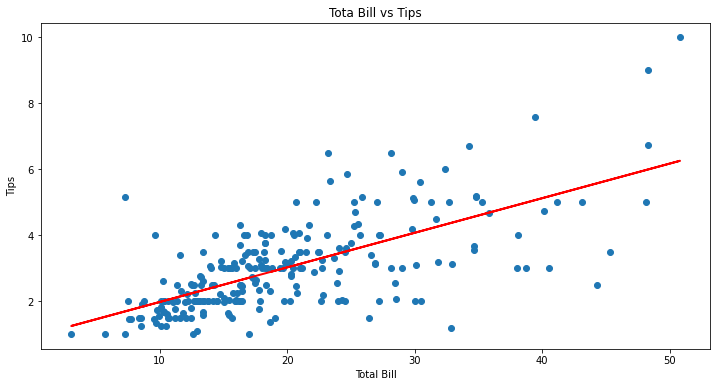

In [27]:
# Predict values
tip_predict = model.predict()

# Plot regression against actual data
plt.figure(figsize=(12, 6))
plt.plot(tips['total_bill'], tips['tip'], 'o') # scatter plot showing actual data
plt.plot(tips['total_bill'], tip_predict, 'r', linewidth=2) # regression line
plt.xlabel('Total Bill')
plt.ylabel('Tips')
plt.title('Tota Bill vs Tips')

plt.show()